## **IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd                            
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split       
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier

import time

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

## **Loading Data...**

In [2]:
df_gempa = pd.read_csv('earthquake_dataset.csv',header=0) #membaca data dan simpan pada df_gempa

df_gempa.head()



,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


## **Membaca tipedata dan deskripsi data**

In [3]:
print("Jumlah baris, kolom:", df_gempa.shape)    
print("\nTipe data:")
print(df_gempa.dtypes)

df_gempa.describe()

Jumlah baris, kolom: (1300, 6)

Tipe data:
magnitude    float64
depth        float64
cdi          float64
mmi          float64
sig          float64
alert         object
dtype: object


,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


## **Mengubah Alert(Object) Menjadi Numerik**

In [4]:
df_gempa['alert'].unique() #melakukan pengecekan isi alert ada apa saja




array(['green', 'yellow', 'orange', 'red'], dtype=object)

In [5]:
mapping = {
    'green': 0,
    'yellow': 1,
    'orange': 2,
    'red': 3
}  #melakukan mapping isi dari array menjadi numerik
df_gempa2 = df_gempa
df_gempa2['alert'] = df_gempa2['alert'].map(mapping)

In [6]:
df_gempa2.head(20) #hasil dari konversi

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,0
1,6.9,25.0,4.0,4.0,-33.0,0
2,7.0,579.0,3.0,3.0,-13.0,0
3,7.3,37.0,5.0,5.0,65.0,0
4,6.6,624.0,0.0,2.0,-98.0,0
5,7.0,660.0,4.0,3.0,-13.0,0
6,6.8,630.0,1.0,3.0,-57.0,0
7,6.7,20.0,7.0,6.0,29.0,0
8,6.8,20.0,8.0,7.0,-101.0,1
9,7.6,26.0,9.0,8.0,7.0,1


## **Pembersihan Data : pengecekan Data NULL & Pembersihan Data Duplikat**

In [ ]:
print("Jumlah nilai kosong per kolom:\n", df_gempa2.isnull().sum())
print("Jumlah data duplikat:", df_gempa2.duplicated().sum())


Jumlah nilai kosong per kolom:
 magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64
Jumlah data duplikat: 44


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,0
1,6.9,25.0,4.0,4.0,-33.0,0
2,7.0,579.0,3.0,3.0,-13.0,0
3,7.3,37.0,5.0,5.0,65.0,0
4,6.6,624.0,0.0,2.0,-98.0,0
5,7.0,660.0,4.0,3.0,-13.0,0
6,6.8,630.0,1.0,3.0,-57.0,0
7,6.7,20.0,7.0,6.0,29.0,0
8,6.8,20.0,8.0,7.0,-101.0,1
9,7.6,26.0,9.0,8.0,7.0,1


In [8]:
df_gempa3 = df_gempa2 #alasan bikin sampe gempa3 itu buat mencegah ada korup data sehingga perlu run dari awal jika korup
df_gempa3 = df_gempa3.drop_duplicates() #penghapusan data duplikat

print("Jumlah data duplikat:", df_gempa3.duplicated().sum()) #cek data duplikat

X = df_gempa3.drop(columns=['alert'])
y = df_gempa3['alert']


Jumlah data duplikat: 0


## **Pembagian Data Train Train/TestSplit**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.4,      
    random_state=86,   # NPM terbesar
    stratify=y          
)

print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)

Ukuran X_train, X_test: (753, 5) (503, 5)


##  **Membangun Model Gradient Boosting Classifier dengan Pipeline**

In [10]:
pipe_GBS = Pipeline(steps=[
    ('feat_select', SelectKBest()),    # variabel default hanya buat pengisi, sudah diurus di param 
    ('clf', GradientBoostingClassifier(     
        n_estimators=100,        
        learning_rate=0.2,      
        max_depth=3,             
        random_state=86            
    ))
])


## **Pembuatan Params dan juga GridSearch**

In [11]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_gb = [
    { #bandingkan dengan selectKBest
        'feat_select__k': np.arange(1, 6), 
        'clf__n_estimators': [100],
        'clf__max_depth': [3, 5, 10],
        'clf__min_samples_split': [2, 5]
    },
    { #bandingkan dengan select percentil
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': [50, 70, 90],
        'clf__n_estimators': [100],
        'clf__max_depth': [3, 5, 10],
        'clf__min_samples_split': [2, 5]
    }
]

gscv_gb = GridSearchCV(
    pipe_GBS,
    param_grid_gb,
    cv=SKF,
    scoring='f1_macro',  # untuk bisa menghitung data dengan lebih dari satu kelas karena kalau tidak begini maka ada error hasilnya infinite
    verbose=1,
    n_jobs=-1
)

gscv_gb.fit(X_train, y_train)

print("Best params (Gradient Boosting):", gscv_gb.best_params_) # Hasil dari model dengan Params terbagus
print("Best score (Gradient Boosting):", gscv_gb.best_score_) # Hasil dari model dengan Score terbagius





Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params (Gradient Boosting): {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100, 'feat_select__k': np.int64(5)}
Best score (Gradient Boosting): 0.8741100360485264


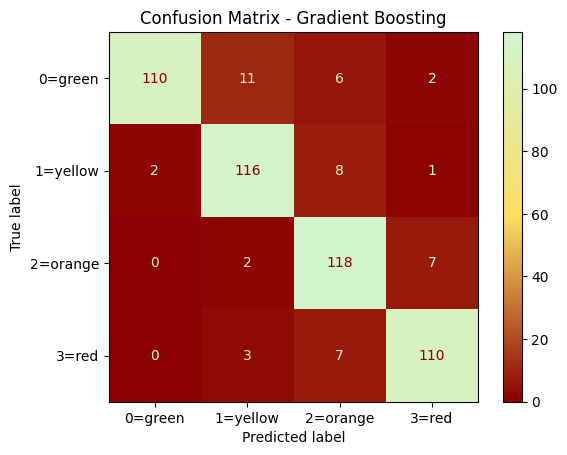


Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       129
           1       0.88      0.91      0.90       127
           2       0.85      0.93      0.89       127
           3       0.92      0.92      0.92       120

    accuracy                           0.90       503
   macro avg       0.91      0.90      0.90       503
weighted avg       0.91      0.90      0.90       503



In [12]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#8B0000", "#fcde62", "#d2f5ce"] # merah tua → kuning → hijau muda
custom_cmap = LinearSegmentedColormap.from_list("red_to_green", colors, N=256)

y_pred_gb = gscv_gb.best_estimator_.predict(X_test)

# Confusion Matrix dan Classification Report
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb,
                                 display_labels=['0=green','1=yellow','2=orange','3=red'])
disp_gb.plot(cmap=custom_cmap)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

print("\nGradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))


## **Membangun Support Vector Machine Dengan Pipeline**

In [ ]:
pipe_svm = Pipeline(steps=[
    ('scaler', StandardScaler()), # variabel default hanya buat pengisi, sudah diurus di param 
    ('feat_select', SelectKBest()), # variabel default hanya buat pengisi, sudah diurus di param 
    ('clf', SVC(
        C=1.0, 
        kernel='linear',
        random_state=86,
    ))
])

params_grid_svm = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()], # langsung melakukan dengan 2 scaler yang lalu nanti dibandingkan secara bersamaan
        'feat_select__k': np.arange(2, 10), # mencari k terbaik
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], # mencari parameter C terbaik            
    },
    {   
        'scaler': [StandardScaler(), MinMaxScaler()], # langsung melakukan dengan 2 scaler yang lalu nanti dibandingkan secara bersamaan
        'feat_select': [SelectPercentile()],                
        'feat_select__percentile': np.arange(20, 80, 10), # mencari persentil terbaik
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], # mencari parameter C terbaik
    }
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gscv_svm = GridSearchCV(
    pipe_svm,
    params_grid_svm,
    cv=SKF,
    scoring='f1_macro', # untuk bisa menghitung data dengan lebih dari satu kelas karena kalau tidak begini maka ada error hasilnya infinite
    verbose=1,
    n_jobs=-1
)

print("Menjalankan GridSearch untuk SVM...")
start = time.time()
gscv_svm.fit(X_train, y_train)
print(f"GridSearch SVM selesai dalam {time.time() - start:.2f} detik")

Menjalankan GridSearch untuk SVM...
Fitting 5 folds for each of 168 candidates, totalling 840 fits
GridSearch SVM selesai dalam 4.68 detik


## **Evaluasi model Support Vector Machine**

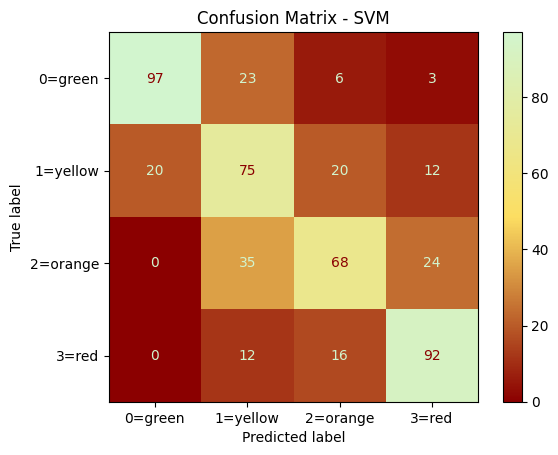


SVM Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       129
           1       0.52      0.59      0.55       127
           2       0.62      0.54      0.57       127
           3       0.70      0.77      0.73       120

    accuracy                           0.66       503
   macro avg       0.67      0.66      0.66       503
weighted avg       0.67      0.66      0.66       503



In [14]:
colors = ["#8B0000", "#fcde62", "#d2f5ce"] # merah tua → kuning → hijau muda
custom_cmap = LinearSegmentedColormap.from_list("red_to_green", colors, N=256)

y_pred_svm = gscv_svm.best_estimator_.predict(X_test)

# Confusion Matrix dan Classification Report
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                                 display_labels=['0=green','1=yellow','2=orange','3=red'])
disp_svm.plot(cmap=custom_cmap)
plt.title("Confusion Matrix - SVM")
plt.show()

print("\nSVM Report:")
print(classification_report(y_test, y_pred_svm))

## **Visualisasi Perbandingan Dua Model Terbaik**

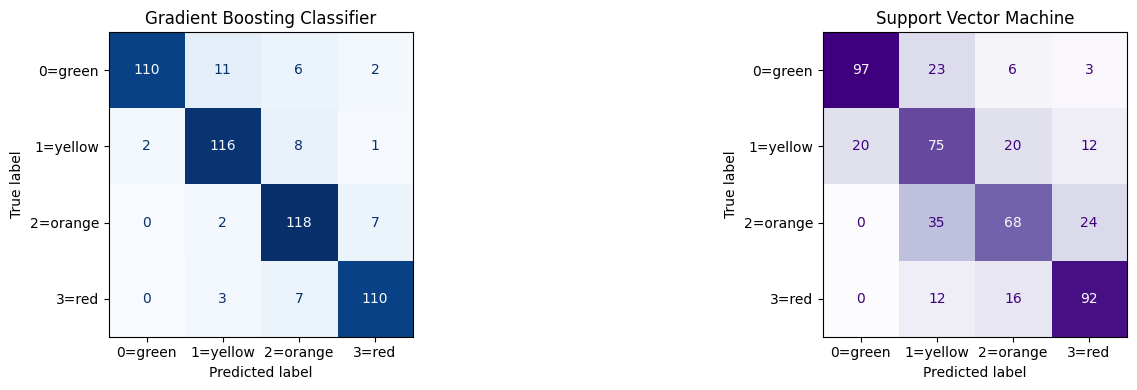

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

disp_gb.plot(ax=ax1, cmap=plt.cm.Blues, colorbar=False)
ax1.set_title("Gradient Boosting Classifier")   


disp_svm.plot(ax=ax2, cmap=plt.cm.Purples, colorbar=False)
ax2.set_title("Support Vector Machine")      



plt.tight_layout()
plt.show()  # tampilkan semua plot

Dapat disimpulkan dari grafik perbandingan diatas antara Algoritma Gradient Boosting Classifier dengan Support Vector Machine, Gradient Boosting Classifier menjadi algoritma yang memiliki akurasi lebih tinggi dibandingkan dengan SVM Linear.

Karena Gradient Boosting menjadi algoritma dengan accuracy terbaik. Kami menjadikan Gradient Boosting sebagai algoritma model kami. Berikut adalah cell untuk export model Gradient Boosting dengan parameter terbaik.

In [16]:
import pickle                                    


best_gb_model = gscv_gb.best_estimator_.named_steps['clf']

with open("best_gradient_boosting.pkl", "wb") as f:   
        pickle.dump(best_gb_model, f)                
        

print("✅ Model gradient boosting terbaik berhasil disimpan ke 'best_gradient_boosting.pkl'")


✅ Model gradient boosting terbaik berhasil disimpan ke 'best_gradient_boosting.pkl'
